In [10]:
import pandas as pd
import numpy as np
import re
from konlpy.tag import Hannanum

In [28]:
moon = open('./data/speech_moon.txt', encoding = 'UTF-8').read()

In [29]:
moon = re.sub('[^가-힣]', ' ', moon)

In [30]:
hannanum = Hannanum()

In [31]:
nouns = hannanum.nouns(moon)

In [32]:
df_word = pd.DataFrame({'word' : nouns})

In [33]:
df_word

,word
0,정권교체
1,정치교체
2,시대교체
3,불비불명
4,고사
...,...
1408,모두
1409,주인
1410,진정한
1411,우리나라


In [34]:
df_word['count'] = df_word['word'].str.len()

In [35]:
df_word = df_word.query('count >= 2')
df_word.sort_values('count')

,word,count
712,국민,2
1164,가사,2
1163,숙제,2
1162,평등,2
644,확대,2
...,...,...
707,평생학습체제,6
1268,군사대결지대,6
173,성적스트레스,6
978,고용영향평가제도,8


In [36]:
df_word = df_word.groupby('word', as_index = False)\
    .agg(n = ('word', 'count'))\
    .sort_values('n', ascending = False)
df_word

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
...,...,...
278,북핵문제,1
279,분단,1
281,분야,1
283,분쟁,1


In [37]:
top20 = df_word.head(20)
top20

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
202,대한민국,11
693,확대,11
525,정치,10
423,우리나라,10
304,사회,9


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='n', ylabel='word'>

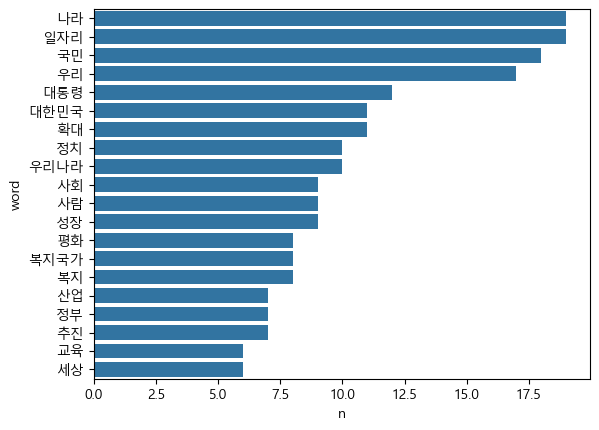

In [42]:
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

sns.barplot(data = top20, y = 'word', x = 'n')

In [43]:
font = './data/DoHyeon-Regular.ttf'

In [44]:
dic_word = df_word.set_index('word').to_dict()['n']

In [47]:
from wordcloud import WordCloud

In [54]:
wc = WordCloud(random_state = 1234, font_path = font, width = 400, height = 400, background_color = 'white')

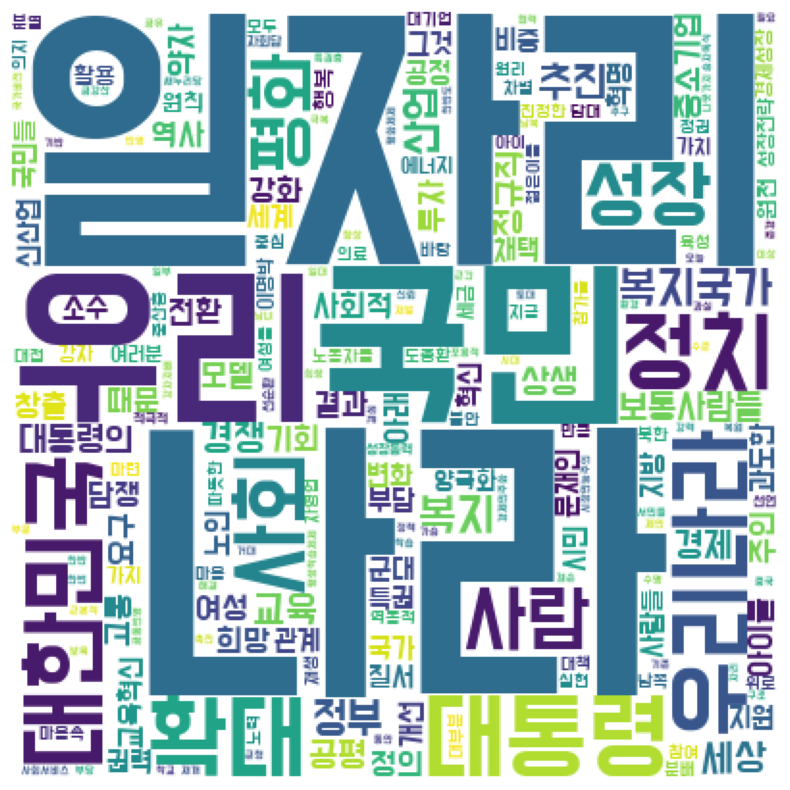

In [55]:
img_wordcloud = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)

In [63]:
import PIL
icon = PIL.Image.open('./data/cloud.png')

In [64]:
img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, icon)
img = np.array(img)

In [67]:
wc = WordCloud(random_state = 1234, font_path = font, width = 400, height = 400, background_color = 'white', mask = img, colormap = 'inferno')

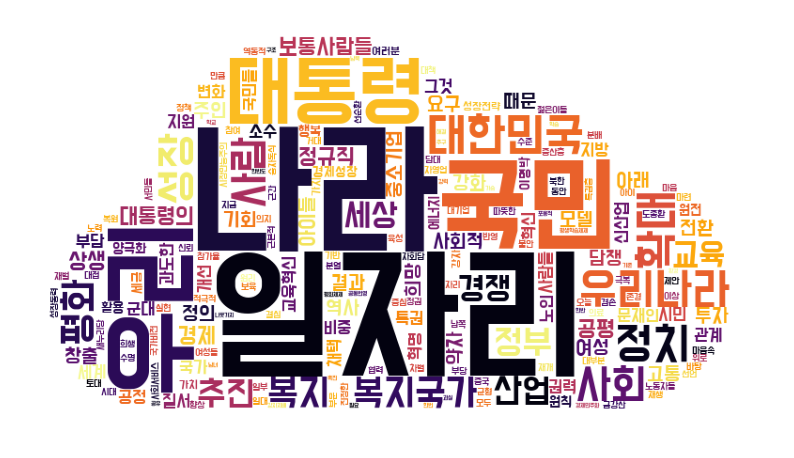

In [68]:
img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)